In [1]:
import os
import sys
import math
import time
import glob 

import multiprocessing as mp
import numpy as np
import scipy.sparse as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

from liblibra_core import *
import util.libutil as comn
from libra_py import units as units
from libra_py import data_conv, data_stat, data_outs, data_read
import libra_py.workflows.nbra.decoherence_times as decoherence_times
import libra_py.workflows.nbra.step4 as step4
import libra_py.workflows.nbra.ann as ann

/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<float,

------------FSSH----------
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_FSSH_batch0
tau: 82.52582165150774  beta: 2.099568259209717  R2: 0.9958469328655353
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_FSSH_batch1
tau: 82.124014906725  beta: 1.8652732526922065  R2: 0.9946219742282345
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_FSSH_batch2
tau: 80.27609714004431  beta: 2.2549346792191405  R2: 0.9970566674402891
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_FSSH_batch3
tau: 77.68282838192664  beta: 2.3726456799461593  R2: 0.9963608837841494
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_FSSH_batch4
tau: 82.32200786475093  beta: 1.9084830965872182  R2: 0.9935099247573128
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_FSSH_batch5
tau: 80.94500898456863  beta: 2.2301916314178944  R2: 0.9957086547213986
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_FSSH_batch6
tau: 8

tau: 287.7633119084341  beta: 1.5726135740854228  R2: 0.9754313009216924
Folder = ./results//namd_regular_hole_only_mb-Hvib_ci/_start_s10_FSSH_batch12
tau: 287.7633119084341  beta: 1.5726135740854228  R2: 0.9754313009216924
Folder = ./results//namd_regular_hole_only_mb-Hvib_ci/_start_s10_FSSH_batch15
tau: 323.6739513793806  beta: 1.1121224462467771  R2: 0.9659375188061302
Folder = ./results//namd_regular_hole_only_mb-Hvib_ci/_start_s10_FSSH_batch13
tau: 323.6739513793806  beta: 1.1121224462467771  R2: 0.9659375188061302
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_FSSH_batch2
tau: 294.0073946557361  beta: 1.5613466768043847  R2: 0.980787815029361
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_FSSH_batch0
tau: 294.0073946557361  beta: 1.5613466768043847  R2: 0.980787815029361
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_FSSH_batch3
tau: 294.0073946557361  beta: 1.5613466768043847  R2: 0.980787815029361
Folder = ./resu

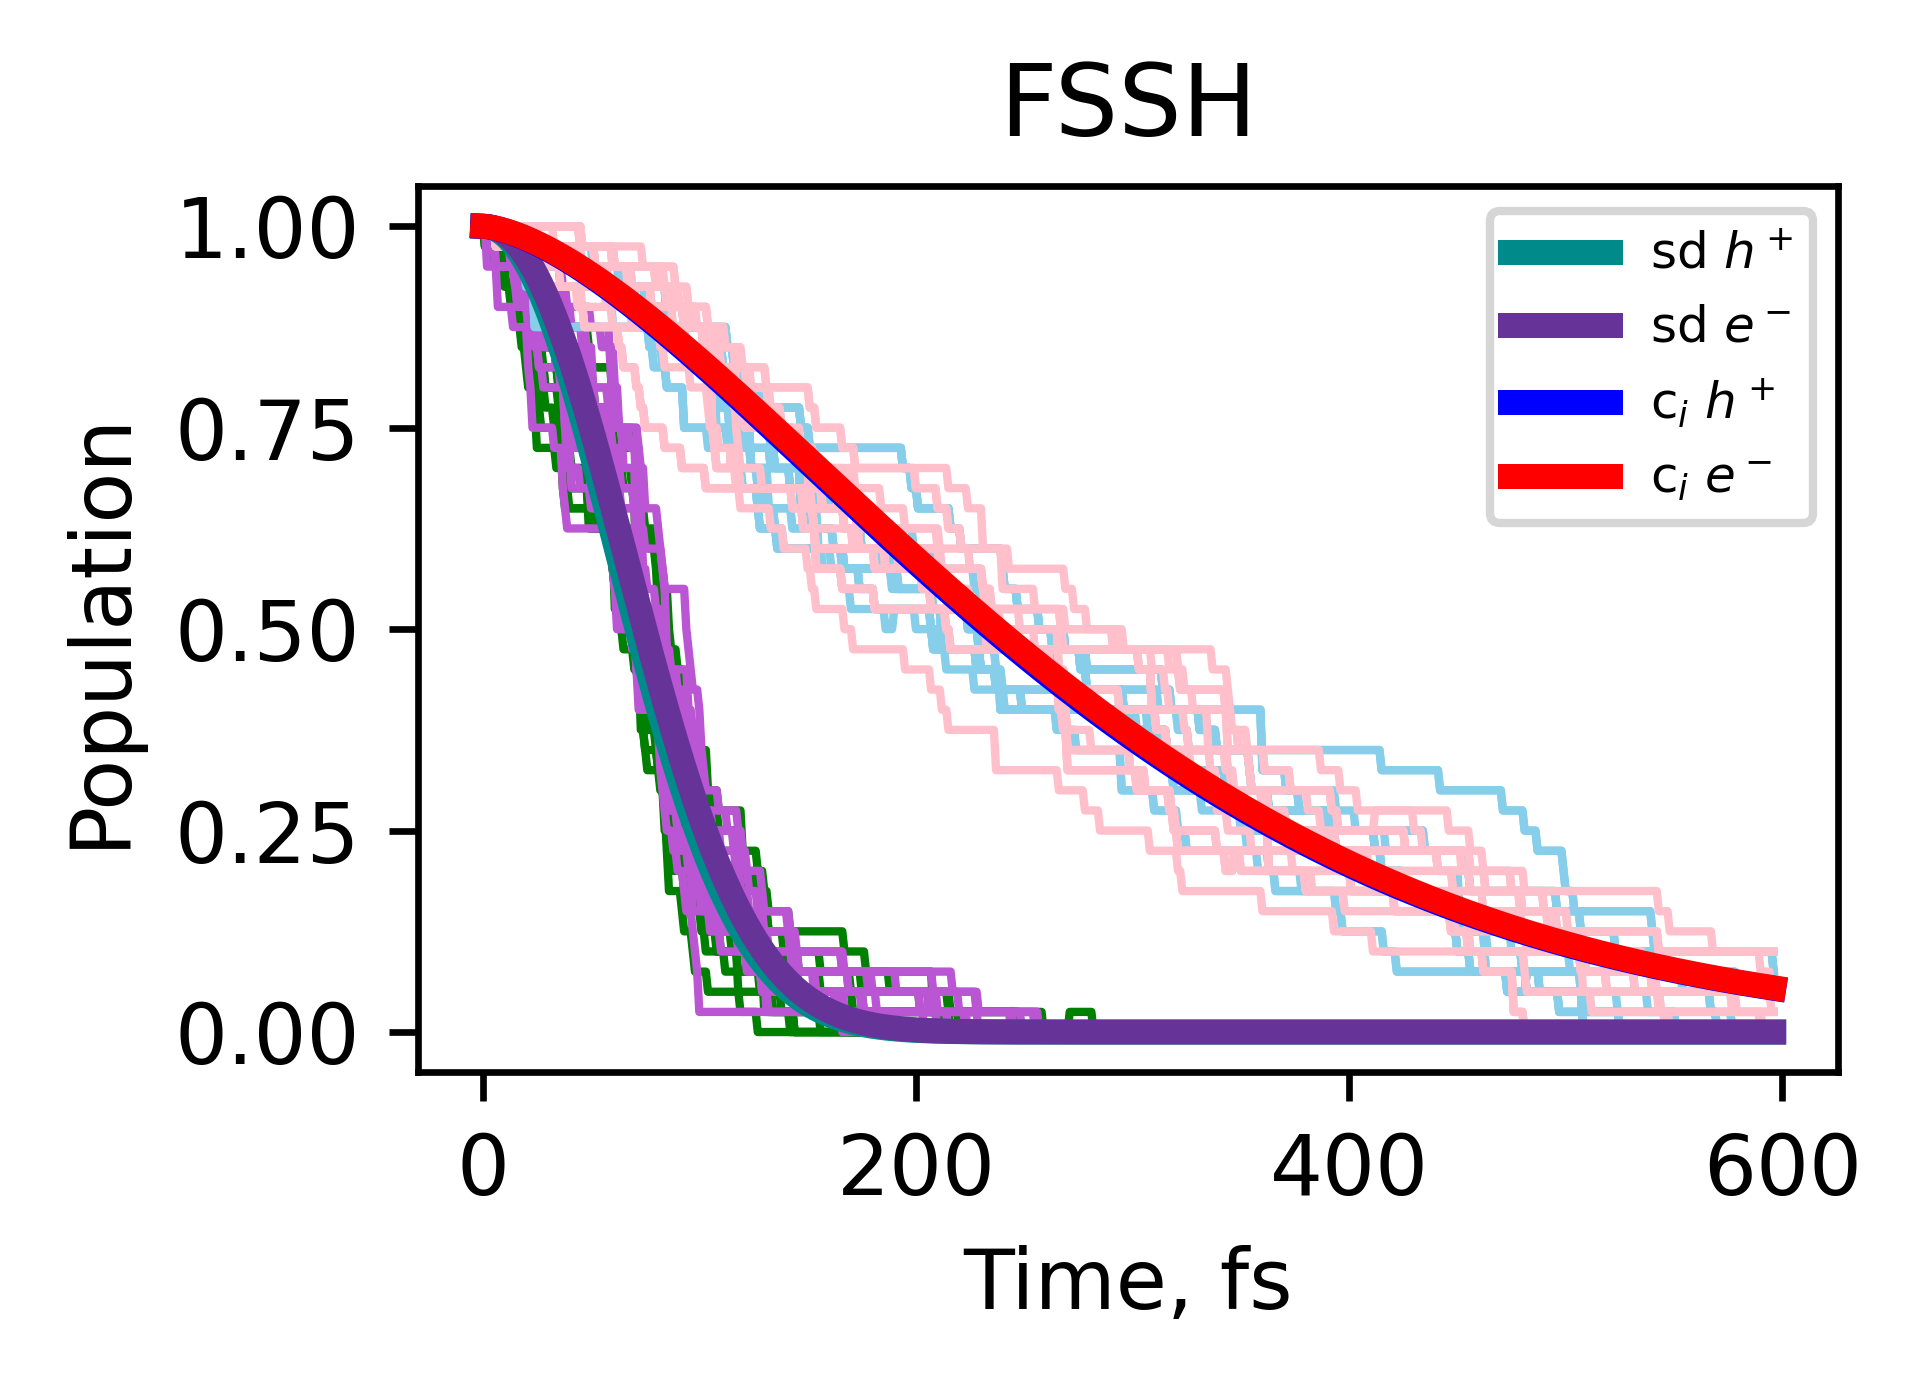

------------IDA----------
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_IDA_batch0
tau: 90.52138565380294  beta: 2.2267040836038783  R2: 0.994169340157748
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_IDA_batch1
tau: 89.13991872693457  beta: 2.5651941311204753  R2: 0.9975520903942942
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_IDA_batch2
tau: 71.64248476392828  beta: 2.2934859354968795  R2: 0.9938489145185865
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_IDA_batch3
tau: 86.90451126645462  beta: 1.5893003525220026  R2: 0.9919534763948028
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_IDA_batch4
tau: 93.35416460205823  beta: 2.0410776809404516  R2: 0.99135985546302
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_IDA_batch5
tau: 99.02845962628905  beta: 1.7258768037403394  R2: 0.9953353407300964
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_IDA_batch6
tau: 101.40794

tau: 235.32244569314224  beta: 1.4345351078407387  R2: 0.9951268690317874
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_IDA_batch2
tau: 235.32244569314224  beta: 1.4345351078407387  R2: 0.9951268690317874
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_IDA_batch0
tau: 235.32244569314224  beta: 1.4345351078407387  R2: 0.9951268690317874
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_IDA_batch5
tau: 281.3167945366786  beta: 1.222796201506179  R2: 0.981936424634114
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_IDA_batch6
tau: 278.57261597999354  beta: 1.7935405777063482  R2: 0.9953588315105699
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_IDA_batch7
tau: 278.57261597999354  beta: 1.7935405777063482  R2: 0.9953588315105699
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_IDA_batch11
tau: 264.09763719789123  beta: 1.2521457431256438  R2: 0.9825254913027738
Fold

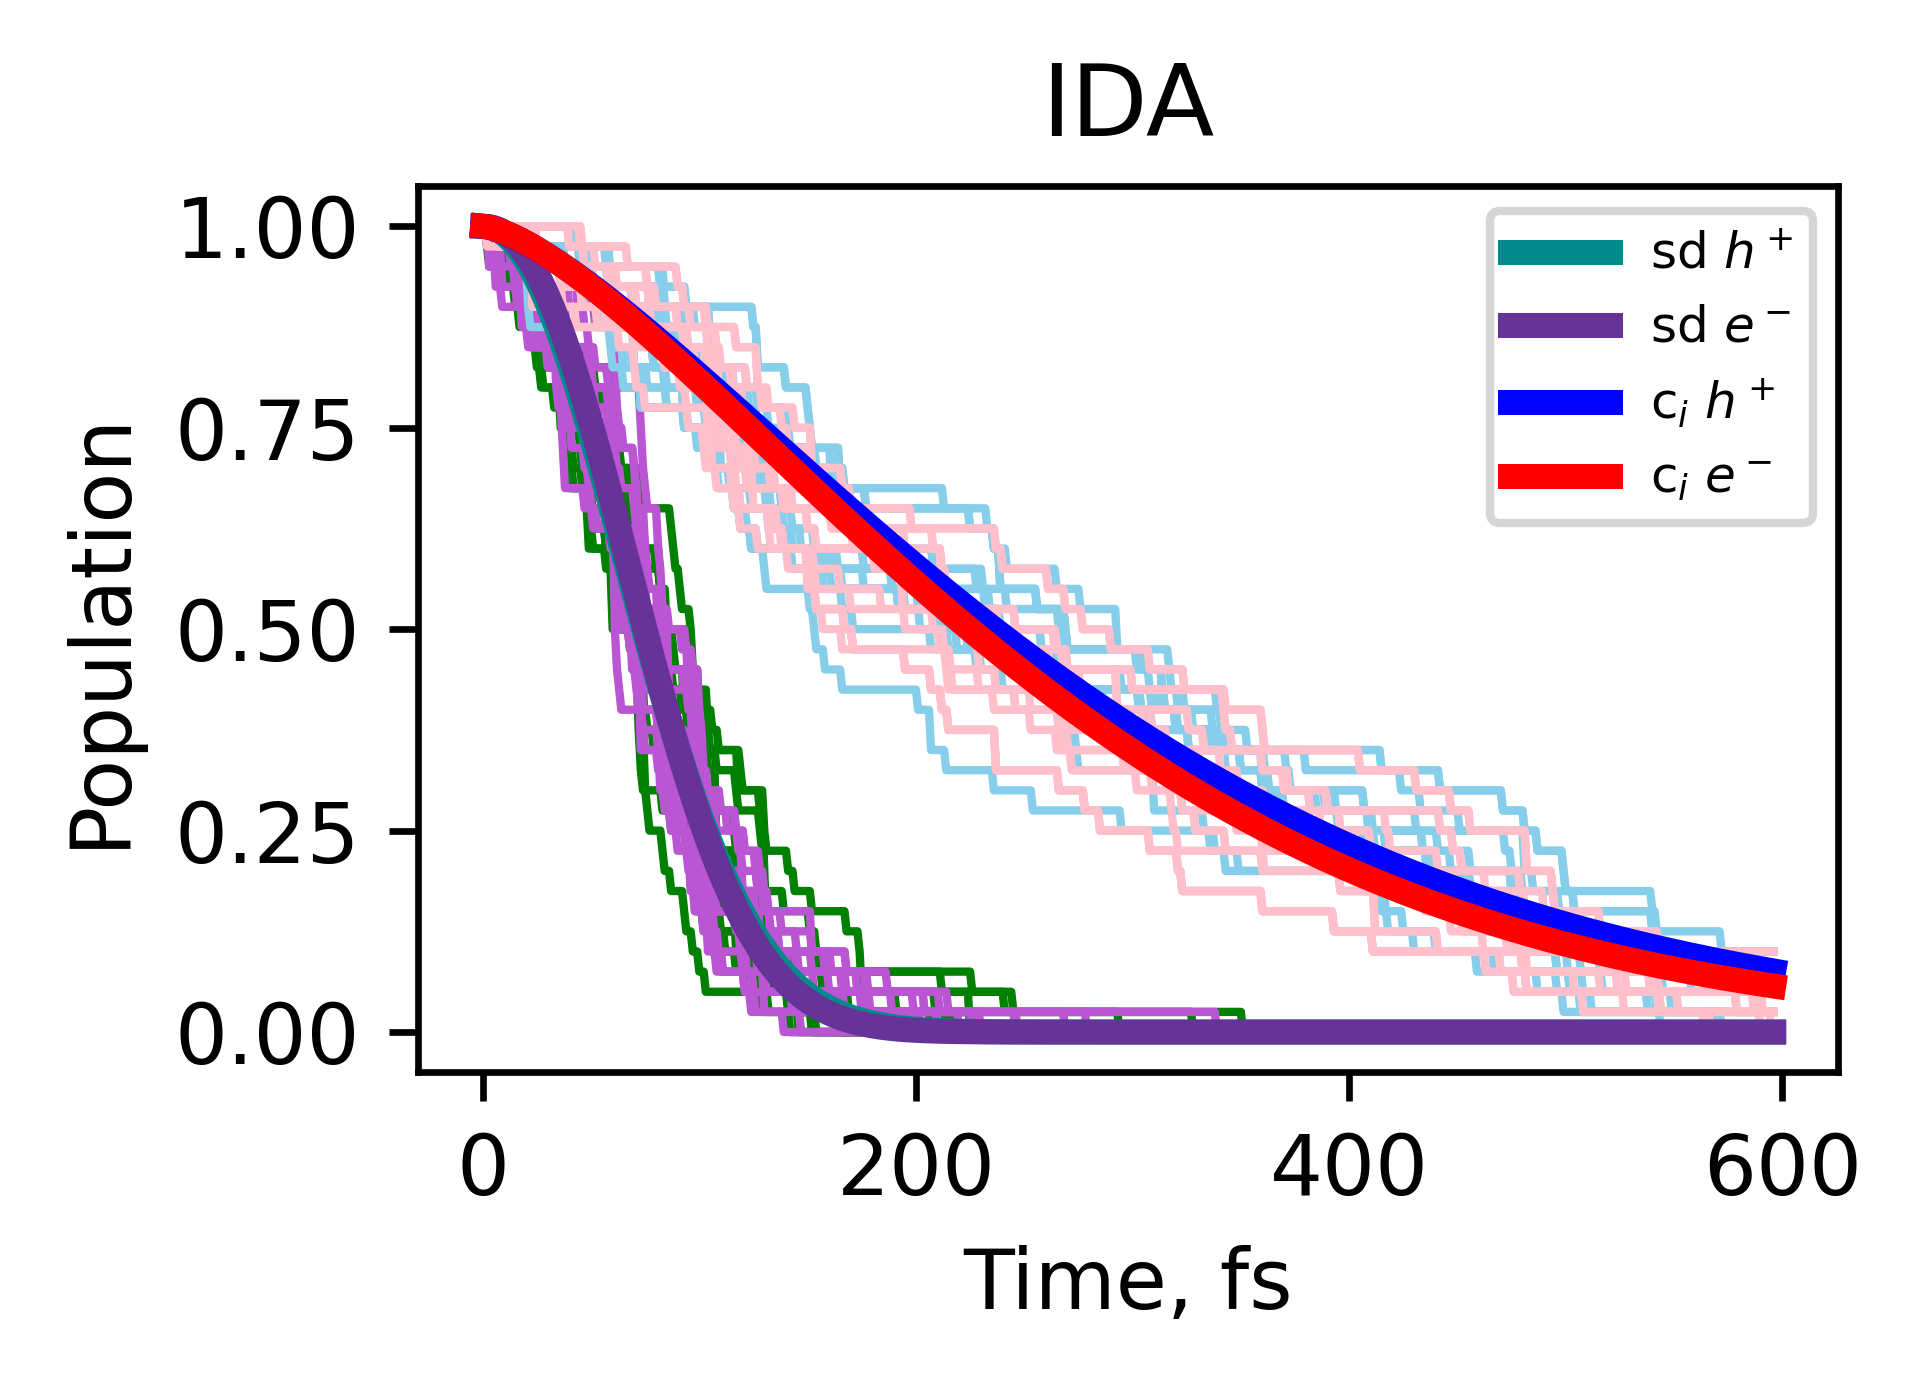

------------mSDM----------
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_mSDM_batch0
tau: 93.54395302848074  beta: 2.4161511946778544  R2: 0.9974184564350612
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_mSDM_batch1
tau: 70.67729838703079  beta: 2.0866265470803897  R2: 0.9945013070363973
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_mSDM_batch2
tau: 79.98937564181807  beta: 2.0053992062108934  R2: 0.997259653579541
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_mSDM_batch3
tau: 79.54404656956667  beta: 2.2602446009784978  R2: 0.9899573938569058
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_mSDM_batch4
tau: 81.81312883246162  beta: 1.9724097119793695  R2: 0.9966188170561606
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_mSDM_batch5
tau: 86.88070733107813  beta: 1.7380946050177624  R2: 0.9920638135242202
Folder = ./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_mSDM_batch6
tau:

tau: 263.13353100029457  beta: 1.322666420619446  R2: 0.9843665389853472
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_mSDM_batch4
tau: 263.13353100029457  beta: 1.322666420619446  R2: 0.9843665389853472
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_mSDM_batch7
tau: 303.36776738374385  beta: 1.2653311247237002  R2: 0.9673657188815314
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_mSDM_batch2
tau: 344.7171945661799  beta: 1.7515157637530996  R2: 0.9816528956276775
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_mSDM_batch5
tau: 310.4205721967946  beta: 1.6352403638685293  R2: 0.9829329355800689
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_mSDM_batch10
tau: 310.4205721967946  beta: 1.6352403638685293  R2: 0.9829329355800689
Folder = ./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_mSDM_batch6
tau: 310.4205721967946  beta: 1.6352403638685293  R2: 0.9829329355800689
F

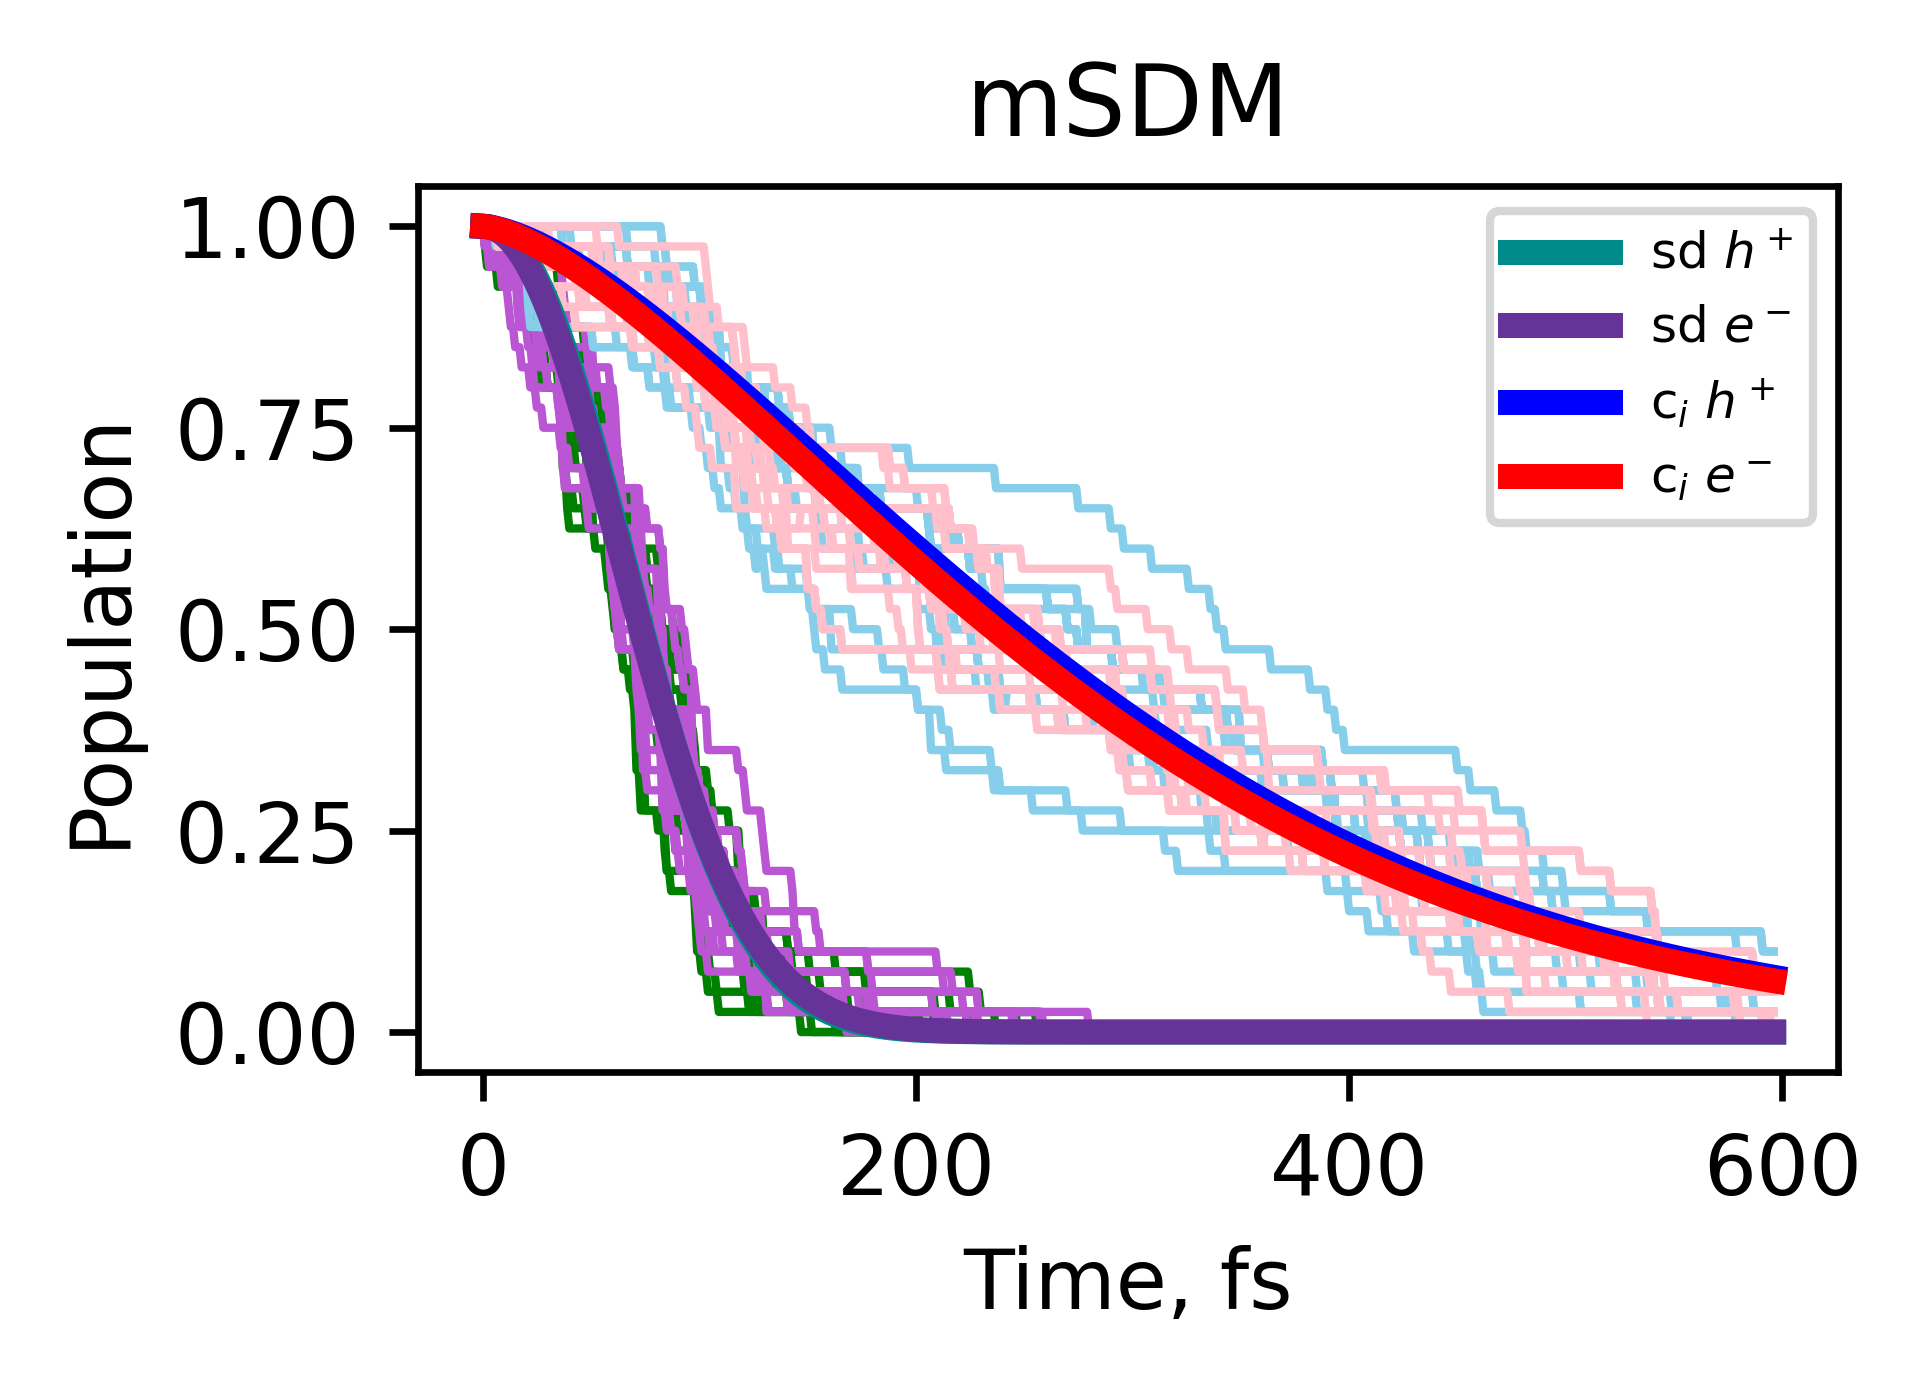

In [2]:
%matplotlib inline
#notebook
#figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=300, edgecolor='black', frameon=True)        

def stretched_compressed(t, tau, beta):
    return np.exp( -np.power(( t/tau ),beta) )

for c, scheme in enumerate(['FSSH', 'IDA','mSDM']):
    figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)
    print(F'------------{scheme}----------')
    #plt.subplot(1,2,c+1)
    folders = glob.glob(F'./results/namd_regular_hole_only_mb-Hvib_sd/_start_s10_{scheme}_batch*', recursive = True)
    taus = []
    betas = []
    
    for folder in folders:
        
        print("Folder =", folder)
        sh_pop = np.loadtxt(folder+'/SH_pop.txt')
        sh_pop_hot_state = sh_pop[:,10]
        md_time = np.arange(0, sh_pop_hot_state.shape[0], 1.0)
        popt, pcov = curve_fit( stretched_compressed, md_time, sh_pop_hot_state, 
                                   bounds=([0.0, 0.0],[np.inf, np.inf]))
        tau, beta = popt
        # Computing the R-squared
        residuals  = sh_pop_hot_state - stretched_compressed(md_time, *popt)
        ss_res     = np.sum(residuals**2)
        ss_tot     = np.sum((sh_pop_hot_state - np.mean(sh_pop_hot_state))**2)
        r_squared  = 1.0 - (ss_res / ss_tot)
        print('tau:', tau, ' beta:', beta,' R2:', r_squared)
        
        if r_squared>0.01:
            taus.append(tau)
            betas.append(beta)
            plt.plot(md_time, sh_pop_hot_state,  linewidth=1, color = 'green')
            
    ave_tau = np.average(np.array(taus))
    ave_beta = np.average(np.array(betas))
    # Compute the erro bars
    # The confidence interval
    Z = 1.96
    N = len(taus)
    s = np.std(np.array(taus))
    error_bar = Z*s/np.sqrt(N)
    
######################################################################################################################        
    
    
    folders2 = glob.glob(F'./results//namd_regular_electron_only_mb-Hvib_sd/_start_s10_{scheme}_batch*', recursive = True)
    taus2 = []
    betas2 = []    
    for folder in folders2:
        
        print("Folder =", folder)
        sh_pop = np.loadtxt(folder+'/SH_pop.txt')
        sh_pop_hot_state = sh_pop[:,10]
        md_time2 = np.arange(0, sh_pop_hot_state.shape[0], 1.0)
        popt, pcov = curve_fit( stretched_compressed, md_time, sh_pop_hot_state, 
                                   bounds=([0.0, 0.0],[np.inf, np.inf]))
        tau, beta = popt
        # Computing the R-squared
        residuals  = sh_pop_hot_state - stretched_compressed(md_time, *popt)
        ss_res     = np.sum(residuals**2)
        ss_tot     = np.sum((sh_pop_hot_state - np.mean(sh_pop_hot_state))**2)
        r_squared  = 1.0 - (ss_res / ss_tot)
        print('tau:', tau, ' beta:', beta,' R2:', r_squared)
        
        if r_squared>0.01:
            taus2.append(tau)
            betas2.append(beta)
            plt.plot(md_time2, sh_pop_hot_state,  linewidth=1, color = "mediumorchid")
            
    ave_tau2 = np.average(np.array(taus2))
    ave_beta2 = np.average(np.array(betas2))
    # Compute the erro bars
    # The confidence interval
    Z = 1.96
    N = len(taus2)
    s = np.std(np.array(taus2))
    error_bar = Z*s/np.sqrt(N)
    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@2    
    
    folders3 = glob.glob(F'./results//namd_regular_hole_only_mb-Hvib_ci/_start_s10_{scheme}_batch*', recursive = True)
    taus3 = []
    betas3 = []    
    for folder in folders3:
        
        print("Folder =", folder)
        sh_pop = np.loadtxt(folder+'/SH_pop.txt')
        sh_pop_hot_state = sh_pop[:,10]
        md_time3 = np.arange(0, sh_pop_hot_state.shape[0], 1.0)
        popt, pcov = curve_fit( stretched_compressed, md_time, sh_pop_hot_state, 
                                   bounds=([0.0, 0.0],[np.inf, np.inf]))
        tau, beta = popt
        # Computing the R-squared
        residuals  = sh_pop_hot_state - stretched_compressed(md_time, *popt)
        ss_res     = np.sum(residuals**2)
        ss_tot     = np.sum((sh_pop_hot_state - np.mean(sh_pop_hot_state))**2)
        r_squared  = 1.0 - (ss_res / ss_tot)
        print('tau:', tau, ' beta:', beta,' R2:', r_squared)
        
        if r_squared>0.01:
            taus3.append(tau)
            betas3.append(beta)
            plt.plot(md_time3, sh_pop_hot_state,  linewidth=1, color = "skyblue")
            
    ave_tau3 = np.average(np.array(taus3))
    ave_beta3 = np.average(np.array(betas3))
    # Compute the erro bars
    # The confidence interval
    Z = 1.96
    N = len(taus3)
    s = np.std(np.array(taus3))
    error_bar = Z*s/np.sqrt(N)
    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@2    
    
    
    folders4 = glob.glob(F'./results//namd_regular_electron_only_mb-Hvib_ci/_start_s10_{scheme}_batch*', recursive = True)
    taus4 = []
    betas4 = []    
    for folder in folders4:
        
        print("Folder =", folder)
        sh_pop = np.loadtxt(folder+'/SH_pop.txt')
        sh_pop_hot_state = sh_pop[:,10]
        md_time4 = np.arange(0, sh_pop_hot_state.shape[0], 1.0)
        popt, pcov = curve_fit( stretched_compressed, md_time, sh_pop_hot_state, 
                                   bounds=([0.0, 0.0],[np.inf, np.inf]))
        tau, beta = popt
        # Computing the R-squared
        residuals  = sh_pop_hot_state - stretched_compressed(md_time, *popt)
        ss_res     = np.sum(residuals**2)
        ss_tot     = np.sum((sh_pop_hot_state - np.mean(sh_pop_hot_state))**2)
        r_squared  = 1.0 - (ss_res / ss_tot)
        print('tau:', tau, ' beta:', beta,' R2:', r_squared)
        
        if r_squared>0.01:
            taus4.append(tau)
            betas4.append(beta)
            plt.plot(md_time4, sh_pop_hot_state,  linewidth=1, color = "pink")
            
    ave_tau4 = np.average(np.array(taus4))
    ave_beta4 = np.average(np.array(betas4))
    # Compute the erro bars
    # The confidence interval
    Z = 1.96
    N = len(taus4)
    s = np.std(np.array(taus4))
    error_bar = Z*s/np.sqrt(N)
    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@2    
 #   
 #   
 #   folders5 = glob.glob(F'./results//namd_regular_electron_only_sd/_start_s10_{scheme}_batch*', recursive = True)
 #   taus5 = []
 #   betas5 = []    
 #   for folder in folders5:
 #       
 #       print("Folder =", folder)
 #       sh_pop = np.loadtxt(folder+'/SH_pop.txt')
 #       sh_pop_hot_state = sh_pop[:,10]
 #       md_time5 = np.arange(0, sh_pop_hot_state.shape[0], 1.0)
 #       popt, pcov = curve_fit( stretched_compressed, md_time, sh_pop_hot_state, 
 #                                  bounds=([0.0, 0.0],[np.inf, np.inf]))
 #       tau, beta = popt
 #       # Computing the R-squared
 #       residuals  = sh_pop_hot_state - stretched_compressed(md_time, *popt)
 #       ss_res     = np.sum(residuals**2)
 #       ss_tot     = np.sum((sh_pop_hot_state - np.mean(sh_pop_hot_state))**2)
 #       r_squared  = 1.0 - (ss_res / ss_tot)
 #       print('tau:', tau, ' beta:', beta,' R2:', r_squared)
 #       
 #       if r_squared>0.01:
 #           taus5.append(tau)
 #           betas5.append(beta)
 #           plt.plot(md_time5, sh_pop_hot_state,  linewidth=1, color = "pink")
 #           
 #   ave_tau5 = np.average(np.array(taus5))
 #   ave_beta5 = np.average(np.array(betas5))
 #   # Compute the erro bars
 #   # The confidence interval
 #   Z = 1.96
 #   N = len(taus5)
 #   s = np.std(np.array(taus5))
 #   error_bar = Z*s/np.sqrt(N)
 #   
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@2    
    
   # 
   # folders6 = glob.glob(F'./results//namd_regular_electron_only_sd/_start_s10_{scheme}_batch*', recursive = True)
   # taus6 = []
   # betas6 = []    
   # for folder in folders6:
   #     
   #     print("Folder =", folder)
   #     sh_pop = np.loadtxt(folder+'/SH_pop.txt')
   #     sh_pop_hot_state = sh_pop[:,10]
   #     md_time6 = np.arange(0, sh_pop_hot_state.shape[0], 1.0)
   #     popt, pcov = curve_fit( stretched_compressed, md_time, sh_pop_hot_state, 
   #                                bounds=([0.0, 0.0],[np.inf, np.inf]))
   #     tau, beta = popt
   #     # Computing the R-squared
   #     residuals  = sh_pop_hot_state - stretched_compressed(md_time, *popt)
   #     ss_res     = np.sum(residuals**2)
   #     ss_tot     = np.sum((sh_pop_hot_state - np.mean(sh_pop_hot_state))**2)
   #     r_squared  = 1.0 - (ss_res / ss_tot)
   #     print('tau:', tau, ' beta:', beta,' R2:', r_squared)
   #     
   #     if r_squared>0.01:
   #         taus6.append(tau)
   #         betas6.append(beta)
   #         plt.plot(md_time6, sh_pop_hot_state,  linewidth=1, color = "pink")
   #         
   # ave_tau6 = np.average(np.array(taus6))
   # ave_beta6 = np.average(np.array(betas6))
   # # Compute the erro bars
   # # The confidence interval
   # Z = 1.96
   # N = len(taus6)
   # s = np.std(np.array(taus6))
   # error_bar = Z*s/np.sqrt(N)
   # 
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@2    
  
    
    print(F'The timescales: {ave_tau}+-{error_bar} average over {len(taus)} samples')
    # Plot average fit
    #plt.plot(md_time, stretched_compressed(md_time, ave_tau-error_bar, ave_beta), ls='--',linewidth=3, color='red')
    plt.plot(md_time, stretched_compressed(md_time, ave_tau,           ave_beta), ls='-',  linewidth=3,label='sd $h^+$', color='darkcyan')
    plt.plot(md_time2, stretched_compressed(md_time2, ave_tau2,           ave_beta2), ls='-',  linewidth=3,label='sd $e^-$', color='rebeccapurple')
    plt.plot(md_time3, stretched_compressed(md_time3, ave_tau3,           ave_beta3), ls='-',  linewidth=3,label='c$_i$ $h^+$', color='blue')
    plt.plot(md_time4, stretched_compressed(md_time4, ave_tau4,           ave_beta4), ls='-',  linewidth=3,label='c$_i$ $e^-$', color='red')
    #plt.plot(md_time5, stretched_compressed(md_time5, ave_tau5,           ave_beta5), ls='-',  linewidth=3,label='sp $h^+$', color='black')
    #plt.plot(md_time6, stretched_compressed(md_time6, ave_tau6,           ave_beta6), ls='--',  linewidth=3,label='sp $e^-$', color='gray')

    #plt.plot(md_time, stretched_compressed(md_time, ave_tau+error_bar, ave_beta), ls='--', linewidth=3, color='red')
        
    plt.legend(fontsize=6, ncol=1, loc='upper right')
    plt.title(scheme)
    plt.xlabel('Time, fs')
    plt.ylabel('Population')
    plt.tight_layout()
    plt.savefig(F'./results/{scheme}electron_hole_only-mb-sd.png', dpi=600)
    plt.show() 